### 3-parameter exponential fitted $\beta$-scaling

Want to fit observable data as a function of $\beta$ to the form:
$$
\mathcal{O}(\beta) = \mathcal{O}_{\beta\to\infty} + C_1 e^{-C_2 \beta}
$$

where $\mathcal{O}_{\beta\to\infty}$,$C_1$, and $C_2$ are fitting parameters. The $\mathcal{O}_{\beta\to\infty}$ parameter will give a large $\beta$ extrapolation of the observable in question. Here, we will focus on the second Rényi entanglement entropy $S_2$.

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from scipy import optimize

Define the exponential model

In [53]:
def exponential(x, c1, c2, c3):
    return c3 + c1*np.exp(-x*c2)

In [54]:
# Array where extrapolated S2s will be saved to
extrapolated_S2s = np.zeros(15)
extrapolated_S2s_err = np.zeros(15)

Feed data points (obtained from a separate script)

In [55]:
U_list = np.array([0.500000,
                0.730000,
                1.065800,
                1.556100, 
                2.272000, 
                3.300000, 
                4.843100, 
                7.071100,   
                10.323900,
                16.666667, 
                22.007100, 
                32.130800,
                46.911700,
                68.492100,
                100.000000])

In [56]:
# Define data points
betas = np.array([1,2,4,8,16,32]) # betas

In [57]:
# Initialize arrays that will store S2 data (rows: betas, columns: U)
data = np.ones((betas.size,15))
data[0] = np.loadtxt("../ProcessedData/1D_256_256_128_Us_1.000000_1.000000_10001_S2.dat")[:,1]
data[1] = np.loadtxt("../ProcessedData/1D_256_256_128_Us_1.000000_2.000000_10001_S2.dat")[:,1]
data[2] = np.loadtxt("../ProcessedData/1D_256_256_128_Us_1.000000_4.000000_10001_S2.dat")[:,1]
data[3] = np.loadtxt("../ProcessedData/1D_256_256_128_Us_1.000000_8.000000_10001_S2.dat")[:,1]
data[4] = np.loadtxt("../ProcessedData/1D_256_256_128_Us_1.000000_16.000000_10001_S2.dat")[:,1]
data[5] = np.loadtxt("../ProcessedData/1D_256_256_128_Us_1.000000_32.000000_10001_S2.dat")[:,1]

errs = np.ones((betas.size,15))
errs[0] = np.loadtxt("../ProcessedData/1D_256_256_128_Us_1.000000_1.000000_10001_S2.dat")[:,2]
errs[1] = np.loadtxt("../ProcessedData/1D_256_256_128_Us_1.000000_2.000000_10001_S2.dat")[:,2]
errs[2] = np.loadtxt("../ProcessedData/1D_256_256_128_Us_1.000000_4.000000_10001_S2.dat")[:,2]
errs[3] = np.loadtxt("../ProcessedData/1D_256_256_128_Us_1.000000_8.000000_10001_S2.dat")[:,2]
errs[4] = np.loadtxt("../ProcessedData/1D_256_256_128_Us_1.000000_16.000000_10001_S2.dat")[:,2]
errs[5] = np.loadtxt("../ProcessedData/1D_256_256_128_Us_1.000000_32.000000_10001_S2.dat")[:,2]

S2 (extrapolated) 

2.523991 +/- 0.029386


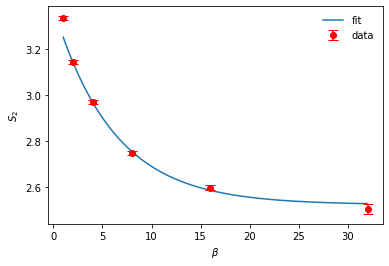

In [58]:
# Obtained with entanglement_combiner.py for betas
U = 0.500000
y_array_exp = data[:,0]
sigmas = errs[:,0]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[2:], y_array_exp[2:],sigma=sigmas[2:],p0=[0.9,0.1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c3_err = np.sqrt(np.diag(pcov_exponential)[2])

extrapolated_S2s[0] = c3
extrapolated_S2s_err[0] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

2.368975 +/- 0.003893


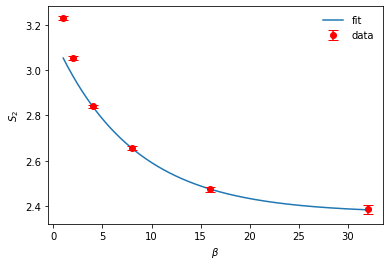

In [59]:
# Obtained with entanglement_combiner.py for betas
U = 0.730000
y_array_exp = data[:,1]
sigmas = errs[:,1]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[2:], y_array_exp[2:],sigma=sigmas[2:],p0=[0.9,0.1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c3_err = np.sqrt(np.diag(pcov_exponential)[2])

extrapolated_S2s[1] = c3
extrapolated_S2s_err[1] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

2.309074 +/- 0.025758


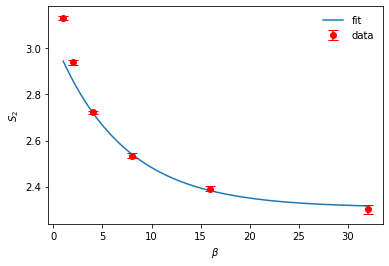

In [60]:
# Obtained with entanglement_combiner.py for betas
U = 1.0658
y_array_exp = data[:,2]
sigmas = errs[:,2]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[2:], y_array_exp[2:],sigma=sigmas[2:],p0=[0.9,0.1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c3_err = np.sqrt(np.diag(pcov_exponential)[2])

extrapolated_S2s[2] = c3
extrapolated_S2s_err[2] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

2.210883 +/- 0.036175


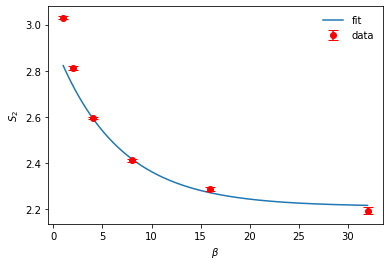

In [61]:
# Obtained with entanglement_combiner.py for betas
U = 1.5561
y_array_exp = data[:,3]
sigmas = errs[:,3]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[2:], y_array_exp[2:],sigma=sigmas[2:],p0=[0.9,0.1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c3_err = np.sqrt(np.diag(pcov_exponential)[2])

extrapolated_S2s[3] = c3
extrapolated_S2s_err[3] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

2.071725 +/- 0.026964


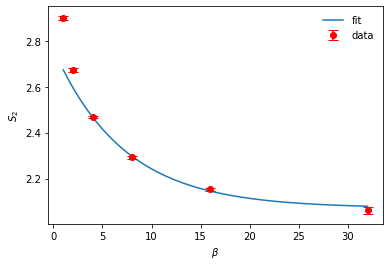

In [62]:
# Obtained with entanglement_combiner.py for betas
U = 2.272
y_array_exp = data[:,4]
sigmas = errs[:,4]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[2:], y_array_exp[2:],sigma=sigmas[2:],p0=[0.9,0.1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c3_err = np.sqrt(np.diag(pcov_exponential)[2])

extrapolated_S2s[4] = c3
extrapolated_S2s_err[4] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

1.954513 +/- 0.032696


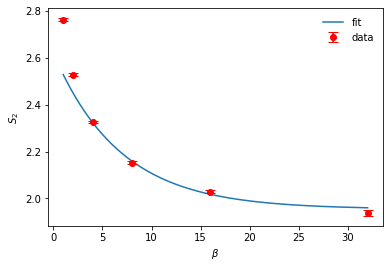

In [63]:
# Obtained with entanglement_combiner.py for betas
U = 3.3
y_array_exp = data[:,5]
sigmas = errs[:,5]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[2:], y_array_exp[2:],sigma=sigmas[2:],p0=[0.9,0.1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c3_err = np.sqrt(np.diag(pcov_exponential)[2])

extrapolated_S2s[5] = c3
extrapolated_S2s_err[5] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

0.882603 +/- 0.349817


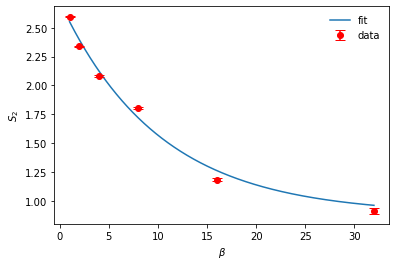

In [64]:
# Obtained with entanglement_combiner.py for betas
U = 4.843100
y_array_exp = data[:,6]
sigmas = errs[:,6]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[0:], y_array_exp[0:],sigma=sigmas[0:],p0=[0.9,0.1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c3_err = np.sqrt(np.diag(pcov_exponential)[2])

extrapolated_S2s[6] = c3
extrapolated_S2s_err[6] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

0.356737 +/- 0.002854


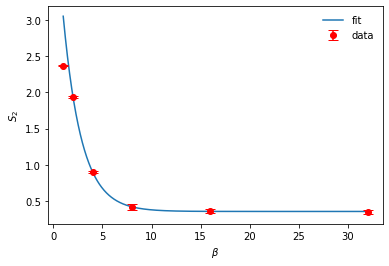

In [65]:
# Obtained with entanglement_combiner.py for betas
U = 7.0711
y_array_exp = data[:,7]
sigmas = errs[:,7]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[1:], y_array_exp[1:],sigma=sigmas[1:],p0=[0.9,0.1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c3_err = np.sqrt(np.diag(pcov_exponential)[2])

extrapolated_S2s[7] = c3
extrapolated_S2s_err[7] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

0.166376 +/- 0.007670


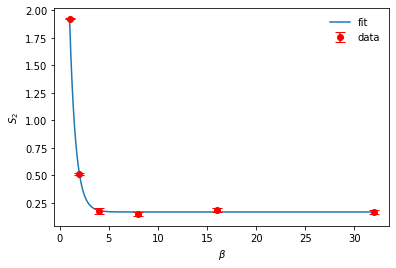

In [66]:
# Obtained with entanglement_combiner.py for betas
U = 10.3239
y_array_exp = data[:,8]
sigmas = errs[:,8]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[0:], y_array_exp[0:],sigma=sigmas[0:],p0=[0.9,0.1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c3_err = np.sqrt(np.diag(pcov_exponential)[2])

extrapolated_S2s[8] = c3
extrapolated_S2s_err[8] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

0.049898 +/- 0.002582


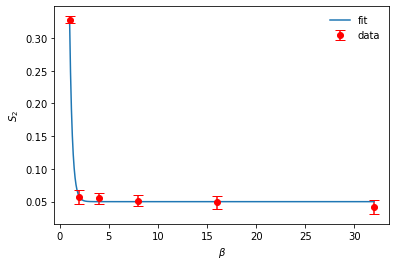

In [67]:
# Obtained with entanglement_combiner.py for betas
U = 16.666667
y_array_exp = data[:,9]
sigmas = errs[:,9]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[0:], y_array_exp[0:],sigma=sigmas[0:],p0=[0.9,0.1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c3_err = np.sqrt(np.diag(pcov_exponential)[2])

extrapolated_S2s[9] = c3
extrapolated_S2s_err[9] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

0.040532 +/- 0.002646


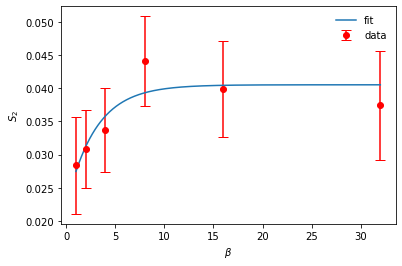

In [68]:
# Obtained with entanglement_combiner.py for betas
U = 22.007100
y_array_exp = data[:,10]
sigmas = errs[:,10]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[0:], y_array_exp[0:],sigma=sigmas[0:],p0=[0.9,0.1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c3_err = np.sqrt(np.diag(pcov_exponential)[2])

extrapolated_S2s[10] = c3
extrapolated_S2s_err[10] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

In [69]:
errs[:,11]

array([0.00449217, 0.00454683, 0.00445229, 0.00471637, 0.00540917,
       0.00637219])

S2 (extrapolated) 

0.017100 +/- 0.001927


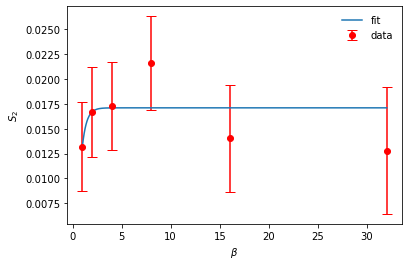

In [70]:
# Obtained with entanglement_combiner.py for betas
U = 32.130800
y_array_exp = data[:,11]
sigmas = errs[:,11]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[0:], y_array_exp[0:],sigma=sigmas[0:],p0=[1.9,1.1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c3_err = np.sqrt(np.diag(pcov_exponential)[2])

extrapolated_S2s[11] = c3
extrapolated_S2s_err[11] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

0.008594 +/- 0.003195


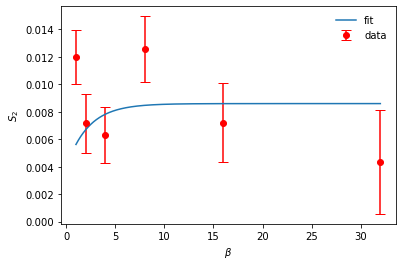

In [71]:
# Obtained with entanglement_combiner.py for betas
U = 46.911700
y_array_exp = data[:,12]
sigmas = errs[:,12]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[1:], y_array_exp[1:],sigma=sigmas[1:],p0=[0.9,1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c3_err = np.sqrt(np.diag(pcov_exponential)[2])

extrapolated_S2s[12] = c3
extrapolated_S2s_err[12] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

0.003617 +/- 0.000181


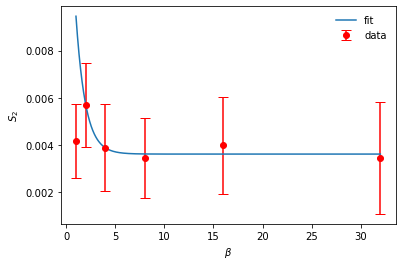

In [72]:
# Obtained with entanglement_combiner.py for betas
U = 68.492100
y_array_exp = data[:,13]
sigmas = errs[:,13]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[1:], y_array_exp[1:],sigma=sigmas[1:],p0=[0.9,1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c3_err = np.sqrt(np.diag(pcov_exponential)[2])

extrapolated_S2s[13] = c3
extrapolated_S2s_err[13] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

0.001145 +/- 0.001627


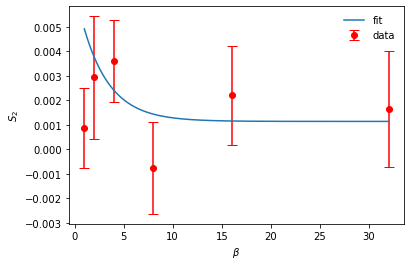

In [73]:
# Obtained with entanglement_combiner.py for betas
U = 100.00
y_array_exp = data[:,14]
sigmas = errs[:,14]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[1:], y_array_exp[1:],sigma=sigmas[1:],p0=[0.9,0.1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c3_err = np.sqrt(np.diag(pcov_exponential)[2])

extrapolated_S2s[14] = c3
extrapolated_S2s_err[14] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

Perform exponential fit to data with Scipy curve_fit

In [74]:
print(list(extrapolated_S2s))
print(list(extrapolated_S2s_err))

[2.5239912620252354, 2.3689754424387615, 2.309074122639528, 2.21088252325784, 2.07172469595276, 1.9545129038486824, 0.8826028148571756, 0.35673739040683017, 0.16637587650604377, 0.049897722981096945, 0.04053236616454268, 0.01709983486747289, 0.008594476479895991, 0.0036169312706772422, 0.0011448981896688695]
[0.02938588049673772, 0.00389306582216278, 0.02575775383115665, 0.03617494284916049, 0.026963896244360682, 0.032696409774905864, 0.34981725054853874, 0.002853633438325747, 0.0076702758689036, 0.0025824048313832938, 0.0026457512960310413, 0.0019267699054918205, 0.0031949207928844685, 0.0001810573520799364, 0.0016265374494737995]


In [75]:
# Save the extrapolations to file here
D=1
L=256
N=256
l_max=128
t=1.000000
bin_size=10001
beta_list = np.array(betas)
#Format the data file
with open("../ProcessedData/"+str(D)+"D_%d_%d_%d_Us_%.6f_extrapolations_%d_S2.dat"%(L,N,l_max,t,bin_size),"wb") as processed_data:
    np.savetxt(processed_data,np.c_[U_list,extrapolated_S2s,extrapolated_S2s_err],delimiter=" ",fmt="%.16f",header="BH Parameters: L=%d,N=%d,D=%d,l=%d,t=%.6f,beta=extrapolations,bin_size=%d \n U               <S2>               StdErr."%(L,N,D,l_max,t,bin_size))